In [27]:
import cv2
from heapq import heappush, heappop, heapify
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Node class for Huffman tree
class Node:
    def __init__(self, symbol=None, freq=0, left=None, right=None):
        self.symbol = symbol
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

In [29]:
# Function to build Huffman tree
def build_huffman_tree(frequencies):
    heap = [Node(symbol=s, freq=f) for s, f in frequencies.items()]
    heapify(heap)

    while len(heap) > 1:
        left = heappop(heap)
        right = heappop(heap)
        internal_node = Node(freq=left.freq + right.freq, left=left, right=right)
        heappush(heap, internal_node)

    return heap[0]

In [30]:
# Function to generate Huffman codes
def generate_huffman_codes(node, code="", mapping=None):
    if mapping is None:
        mapping = {}

    if node is not None:
        if node.symbol is not None:
            mapping[node.symbol] = code
        generate_huffman_codes(node.left, code + "0", mapping)
        generate_huffman_codes(node.right, code + "1", mapping)

    return mapping

In [31]:
def encode_image(image, huffman_codes):
    encoded_image = np.zeros_like(image, dtype=np.uint8)
    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            encoded_image[i, j] = huffman_codes[image[i, j]]

    return encoded_image

In [32]:
# Function to decode image using Huffman codes
def decode_image(encoded_image, huffman_tree):
    rows, cols = encoded_image.shape
    decoded_image = np.zeros_like(encoded_image, dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            node = huffman_tree
            while node.left or node.right:
                if encoded_image[i, j] == 0:
                    node = node.left
                else:
                    node = node.right
                encoded_image[i, j] = encoded_image[i, j] >> 1
            decoded_image[i, j] = node.symbol

    return decoded_image

In [33]:
# Load the image
image_path = '/content/sample_data/european-shorthair-8601492_1280.webp'
original_image = cv2.imread(image_path, 0)


if original_image is None:
  print("Image is not loaded idiota")

# plt.imshow(original_image, cmap="grey")
plt.show()

In [34]:
# Compute pixel frequencies
pixel_frequencies = {}
for row in original_image:
    for pixel in row:
        if pixel in pixel_frequencies:
            pixel_frequencies[pixel] += 1
        else:
            pixel_frequencies[pixel] = 1

In [35]:
# Cell 9: Build Huffman tree
huffman_tree = build_huffman_tree(pixel_frequencies)

# Cell 10: Generate Huffman codes
huffman_codes = generate_huffman_codes(huffman_tree)

# Cell 11: Encode the image
encoded_image = encode_image(original_image, huffman_codes)

# Cell 12: Decode the image
decoded_image = decode_image(encoded_image, huffman_tree)

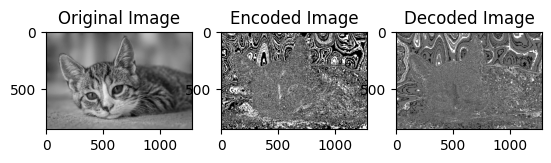

In [36]:
# Display original, encoded, and decoded images
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(encoded_image, cmap="gray")
plt.title("Encoded Image")

plt.subplot(1, 3, 3)
plt.imshow(decoded_image, cmap="gray")
plt.title("Decoded Image")

plt.show()

In [37]:
from PIL import Image

Saved image after hill encryption.


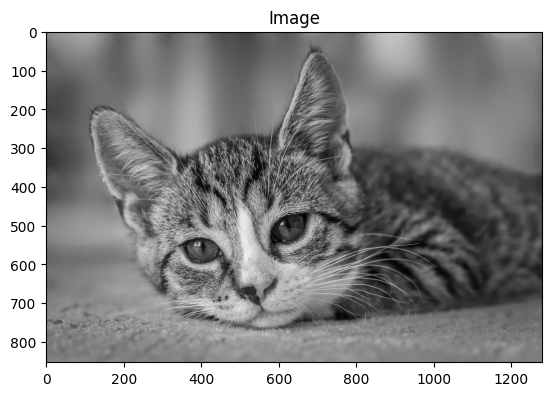

In [41]:
L = (256 * 256)
a1 = [0] * L
a2 = [0] * L
a3 = [0] * L
a4 = [0] * L

b1 = [0] * L
b2 = [0] * L
b3 = [0] * L
b4 = [0] * L

imgl = original_image

# Ensure loop bounds are within array dimensions
for i in range(0, min(L, len(imgl) - 3), 4):
    for j in range(min(3, len(imgl[i]))):  # Fixing the loop bound here
        Q = [imgl[i][j], imgl[i + 1][j], imgl[i + 2][j], imgl[i + 3][j]]
        M = [
            [b4[i + 0], b4[i + 1], 1 - b4[i + 0], -b4[i + 1]],
            [b4[i + 2], b4[i + 3], -b4[i + 2], 1 - b4[i + 3]],
            [1 + b4[i + 0], b4[i + 1], -b4[i + 0], -b4[i + 1]],
            [b4[i + 2], 1 + b4[i + 3], -b4[i + 2], -b4[i + 3]],
        ]
        res = np.dot(M, Q)
        imgl[i][j] = int(res[0] % 256)
        imgl[i + 1][j] = int(res[1] % 256)
        imgl[i + 2][j] = int(res[2] % 256)
        imgl[i + 3][j] = int(res[3] % 256)

# Convert the image list to a NumPy array
imgl1 = np.array(imgl, dtype=np.uint8)

# Convert single-channel image to three-channel (BGR) if needed
imgl1 = cv2.cvtColor(imgl1, cv2.COLOR_GRAY2BGR)

plt.plot()
plt.imshow(imgl1, cmap="gray")
plt.title("Image")

print("Saved image after hill encryption.")
